In [1]:
# importing useful libraries
from keras.preprocessing.image import ImageDataGenerator
from utilities_stoil import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
# Setting up the data
train_img_file = r"C:\Users\hp\Desktop\Courses\CI and DL project\kaggle proj\train.json\data\processed\train.json"

df_data = pd.read_json(train_img_file)
df_head = df_data[0:9] # taking only the first 9 images
train_data = ready_data_df(df_head,mode='train')


X_train = train_data['X_data']
X_train = X_train.reshape(X_train.shape[0],75,75,2)
X_train_img = np.zeros((X_train.shape[0],75,75,3))
X_train_img[:,:,:,0:2] = X_train

y_train = train_data['Y_data']


setting up data dictionary...
(9, 5625, 2)
(9,)
processing data...
data processed


In [3]:
# a function to make the images 3 dim so that matplotlib can plot it
def stoil_img(img_band1,img_band2):    
    img_combined = np.zeros((75,75,3),'uint8')
    img_combined[:,:,0] = img_band1 # R layer
    img_combined[:,:,1] = img_band2 # G layer
    return img_combined

### Plotting the images

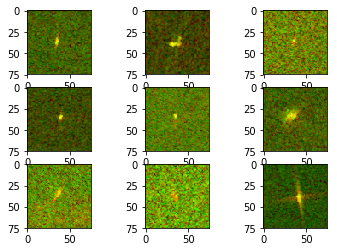

In [4]:
for idx in range(0,9):
    band1 = toUint8Img(np.asarray(X_train[idx,:,:,0]))
    band2 = toUint8Img(np.asarray(X_train[idx,:,:,1]))
    img = stoil_img(band1,band2)
    plt.subplot(330 + 1 + idx)
    plt.imshow(img)
    
# show the plot
plt.show()

### Feature Standardization

In [ ]:
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)
datagen.fit(X_train_img)

for X_batch,y_batch in datagen.flow(X_train_img,y_train, batch_size=9):
    # plot the images
    for idx in range(0,9):
        plt.subplot(330 + 1 + idx)
        img_aug = toUint8Img(X_batch[idx].reshape(75,75,3))
        img_aug[:,:,2] = 0
        plt.imshow(img_aug)
    plt.show()
    break

### Random Rotations

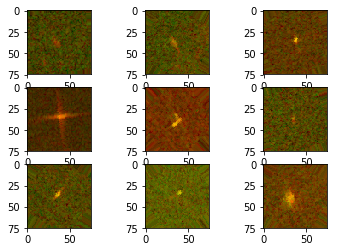

In [7]:
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train_img)

for X_batch,y_batch in datagen.flow(X_train_img,y_train, batch_size=9):
    # plot the images
    for idx in range(0,9):
        plt.subplot(330 + 1 + idx)
        img_aug = toUint8Img(X_batch[idx].reshape(75,75,3))
        img_aug[:,:,2] = 0
        plt.imshow(img_aug)
    plt.show()
    break

### Random flips

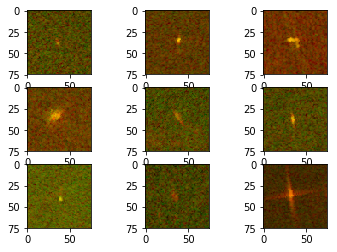

In [6]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
datagen.fit(X_train_img)

for X_batch,y_batch in datagen.flow(X_train_img,y_train, batch_size=9):
    # plot the images
    for idx in range(0,9):
        plt.subplot(330 + 1 + idx)
        img_aug = toUint8Img(X_batch[idx].reshape(75,75,3))
        img_aug[:,:,2] = 0
        plt.imshow(img_aug)
    plt.show()
    break

### Random Shifts

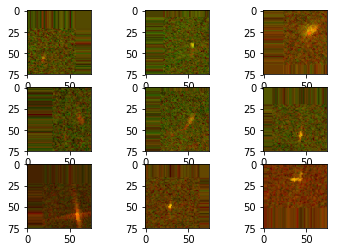

In [14]:
shift = 0.4
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen.fit(X_train_img)

for X_batch,y_batch in datagen.flow(X_train_img,y_train, batch_size=9):
    # plot the images
    for idx in range(0,9):
        plt.subplot(330 + 1 + idx)
        img_aug = toUint8Img(X_batch[idx].reshape(75,75,3))
        img_aug[:,:,2] = 0
        plt.imshow(img_aug)
    plt.show()
    break

### Zooming

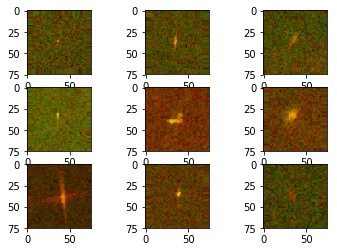

In [17]:
datagen = ImageDataGenerator(zoom_range=0.3)
datagen.fit(X_train_img)

for X_batch,y_batch in datagen.flow(X_train_img,y_train, batch_size=9):
    # plot the images
    for idx in range(0,9):
        plt.subplot(330 + 1 + idx)
        img_aug = toUint8Img(X_batch[idx].reshape(75,75,3))
        img_aug[:,:,2] = 0
        plt.imshow(img_aug)
    plt.show()
    break

### ZCA Whitening

In [15]:
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(X_train_img)

for X_batch,y_batch in datagen.flow(X_train_img,y_train, batch_size=9):
    # plot the images
    for idx in range(0,9):
        plt.subplot(330 + 1 + idx)
        img_aug = toUint8Img(X_batch[idx].reshape(75,75,3))
        img_aug[:,:,2] = 0
        plt.imshow(img_aug)
    plt.show()
    break

MemoryError: 

### Create augmented training data

In [19]:
datagen = ImageDataGenerator(rotation_range=90,
    width_shift_range=0.4,
    height_shift_range=0.4,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True)

total_batches = 10
batch_size=9


datagen.fit(X_train_img)
training_data_sz = total_batches * batch_size
X_train_aug = np.zeros((training_data_sz,75,75,2))

batches_cntr = 0
for X_batch,y_batch in datagen.flow(X_train_img,y_train, batch_size=batch_size):
    # plot the images
    if batches_cntr <= total_batches:
        for idx in range(0,9):
            img_aug = X_batch[idx].reshape(75,75,3)
            X_train_aug[batches_cntr + idx,:,:,:] = img_aug[:,:,0:2]
        batches_cntr += 1
    else:
        break
        
print("size of data after aug : ", X_train_aug.shape)

size of data after aug :  (90, 75, 75, 2)


### Function to create augmented data

In [23]:
def stoil_aug(X_train,datagen,total_batches,batch_size):
    
    X_train_img = np.zeros((X_train.shape[0],75,75,3))
    X_train_img[:,:,:,0:2] = X_train
    
    datagen.fit(X_train_img)
    
    training_data_sz = total_batches * batch_size
    
    X_train_aug = np.zeros((training_data_sz,75,75,2))
    y_train_aug = np.zeros((training_data_sz))
    
    batches_cntr = 0
    for X_batch,y_batch in datagen.flow(X_train_img,y_train, batch_size=batch_size):
        if batches_cntr <= total_batches:
            for idx in range(0,9):
                img_aug = X_batch[idx].reshape(75,75,3)
                X_train_aug[batches_cntr + idx,:,:,:] = img_aug[:,:,0:2]
                
                y_train_aug[batches_cntr + idx] = y_batch[idx]

            batches_cntr += 1
        else:
            break

    print("size of data after aug : ", X_train_aug.shape)
    print("size of labels after aug : ", y_train_aug.shape)

    return X_train_aug , y_train_aug     

In [24]:
# Testing the augmentation function
X_train_aug , y_train_aug  = stoil_aug(X_train,datagen,total_batches,batch_size)

size of data after aug :  (90, 75, 75, 2)
size of labels after aug :  (90,)
